# Milestone 2
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Memprediksi kepuasan penumpang pesawat

## Problem Statements
- Meload dataset
- Mengidentifikasi faktor-faktor apa saja yang kiranya berkaitan dengan kepuasan penumpang.
- Mengidentifikasi fitur atau kolom apa saja yang relevan
- Mengidentifikasi distribusi kolom-kolom pada dataset
- Menghandle missing value dan outlier
- Membuat pipeline untuk preprocessing dan training
- Mendefinisikan beberapa model untuk training
- Mengevaluasi model
- Tuning hyperparameter model terbaik
- Mengevaluasi ulang model
- Menyimpan model terbaik

## Dataset Desciription
| Column | Description |
| --- | --- |
|Gender| Gender of the passengers (Female, Male)
|Customer Type| The customer type (Loyal customer, disloyal customer)
|Age| The actual age of the passengers
|Type of Travel| Purpose of the flight of the passengers (Personal Travel, Business Travel)
|Class| Travel class in the plane of the passengers (Business, Eco, Eco Plus)
|Flight distance| The flight distance of this journey
|Inflight wifi service| Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
|Departure/Arrival time convenient| Satisfaction level of Departure/Arrival time convenient
|Ease of Online booking| Satisfaction level of online booking
|Gate location| Satisfaction level of Gate location
|Food and drink| Satisfaction level of Food and drink
|Online boarding| Satisfaction level of online boarding
|Seat comfort| Satisfaction level of Seat comfort
|Inflight entertainment| Satisfaction level of inflight entertainment
|On-board service| Satisfaction level of On-board service
|Leg room service| Satisfaction level of Leg room service
|Baggage handling| Satisfaction level of baggage handling
|Check-in service| Satisfaction level of Check-in service
|Inflight service| Satisfaction level of inflight service
|Cleanliness| Satisfaction level of Cleanliness
|Departure Delay in Minutes| Minutes delayed when departure
|Arrival Delay in Minutes| Minutes delayed when Arrival
|Satisfaction| Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
# import library yang dibutuhkan
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.utils import resample,shuffle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Loading

In [2]:
# set max display column
pd.set_option('display.max_columns', 100)

In [3]:
# read data train & data test
df_train = pd.read_csv('train.csv').drop(columns='Unnamed: 0')
df_test = pd.read_csv('test.csv').drop(columns='Unnamed: 0')

In [4]:
df_train.head() # menampilkan 5 data teratas

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Dataset terdiri dari kolom numerikal dan kategorikal

In [5]:
df_train.tail() # menampilkan 5 data terbawah

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

Terdapat missing values pada kolom `Arrival Delay in Minutes` 

In [7]:
# drop unnecessary column
df_train.drop(columns='id',inplace=True)
df_test.drop(columns='id',inplace=True)

In [8]:
# menampilkan standar missing value pada masing masing kolom
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
# menampilkan standar missing value pada masing masing kolom
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
# drop missing value train set
df_train.dropna(inplace=True)

# drop missing value test set
df_test.dropna(inplace=True)

In [11]:
# menampilkan standar missing value pada masing masing kolom
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
# cek data yang memiliki duplikat
n_data_duplicate = df_train.duplicated().sum()
print(f"Jumlah data duplikat sebanyak {n_data_duplicate} entri")

Jumlah data duplikat sebanyak 0 entri


In [13]:
# create inference data
df_infer = df_test.sample(n=10,random_state=42)
df_infer.drop(columns='satisfaction').to_csv('infer.csv',index=False)
df_test.drop(index=df_infer.index,inplace=True)

# Exploratory Data Analysis (EDA)

In [14]:
# menampilkan informasi deskriptif kolom data numerik
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Penumpang pesawat rata rata berumur 40 tahun, dengan jarak terbang sejauk 1100 (tidak disebutkan KM atau Miles). Rata-rata terjadi delay keberangkatan dan kedatangan penerbangan sekitar 15 menit.

In [15]:
df_train.apply(pd.unique)

Gender                                                                  [Male, Female]
Customer Type                                      [Loyal Customer, disloyal Customer]
Age                                  [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...
Type of Travel                                      [Personal Travel, Business travel]
Class                                                        [Eco Plus, Business, Eco]
Flight Distance                      [460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...
Inflight wifi service                                               [3, 2, 4, 1, 5, 0]
Departure/Arrival time convenient                                   [4, 2, 5, 3, 1, 0]
Ease of Online booking                                              [3, 2, 5, 4, 1, 0]
Gate location                                                       [1, 3, 2, 5, 4, 0]
Food and drink                                                      [5, 1, 2, 4, 3, 0]
Online boarding                            

Customer penerbangan terdiri dari `laki-laki` dan `perempuan`. Terdapat 2 jenis penerbangan, yaitu `personal` dan `business`. Juga terdapat kelas penerbangan mulai dari `Eco`, `Eco Plus`, dan `Business`. Kolom numerikal dengan nilai bawah 0 dan nilai atas 5 sepertinya menunjukkan tingkat kepuasan terhadap kolom tersebut dimana 0 adalah tingkat kepuasan terendah dan 5 adalah tingkat kepuasan tertinggi terhadap service di kolom tersebut.

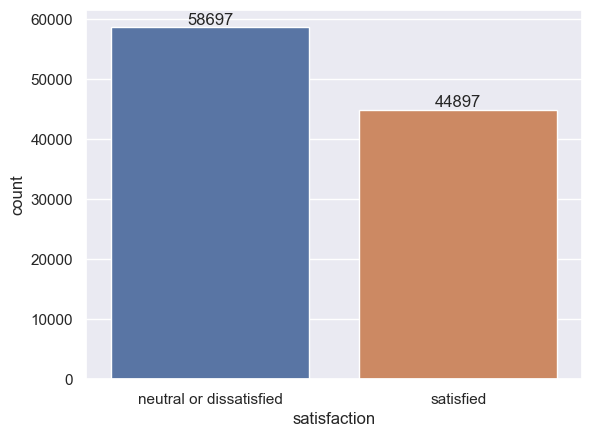

In [16]:
# plot perbandingan pasien yang meninggal dan selamat
ax = sns.countplot(x=df_train.satisfaction, data=df_train)
ax.bar_label(ax.containers[0])
plt.show()

Terdapat `class imbalance` pada dataset dimana penumpang yang merasa puas lebih sedikit dari yang netral/merasa tidak puas.

In [17]:
# keep track of categorical column
cat_col = df_train.select_dtypes(include='object').columns.to_list()
cat_col

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [18]:
# keep track of numerical column as well
num_col = df_train.select_dtypes(include='number').columns.to_list()
num_col

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [19]:
# construct titles for plotting
scaled_num_col = num_col # all num col will be scaled
titles = []
for i in range(len(scaled_num_col)):
    titles.append('Distribusi ' + scaled_num_col[i])

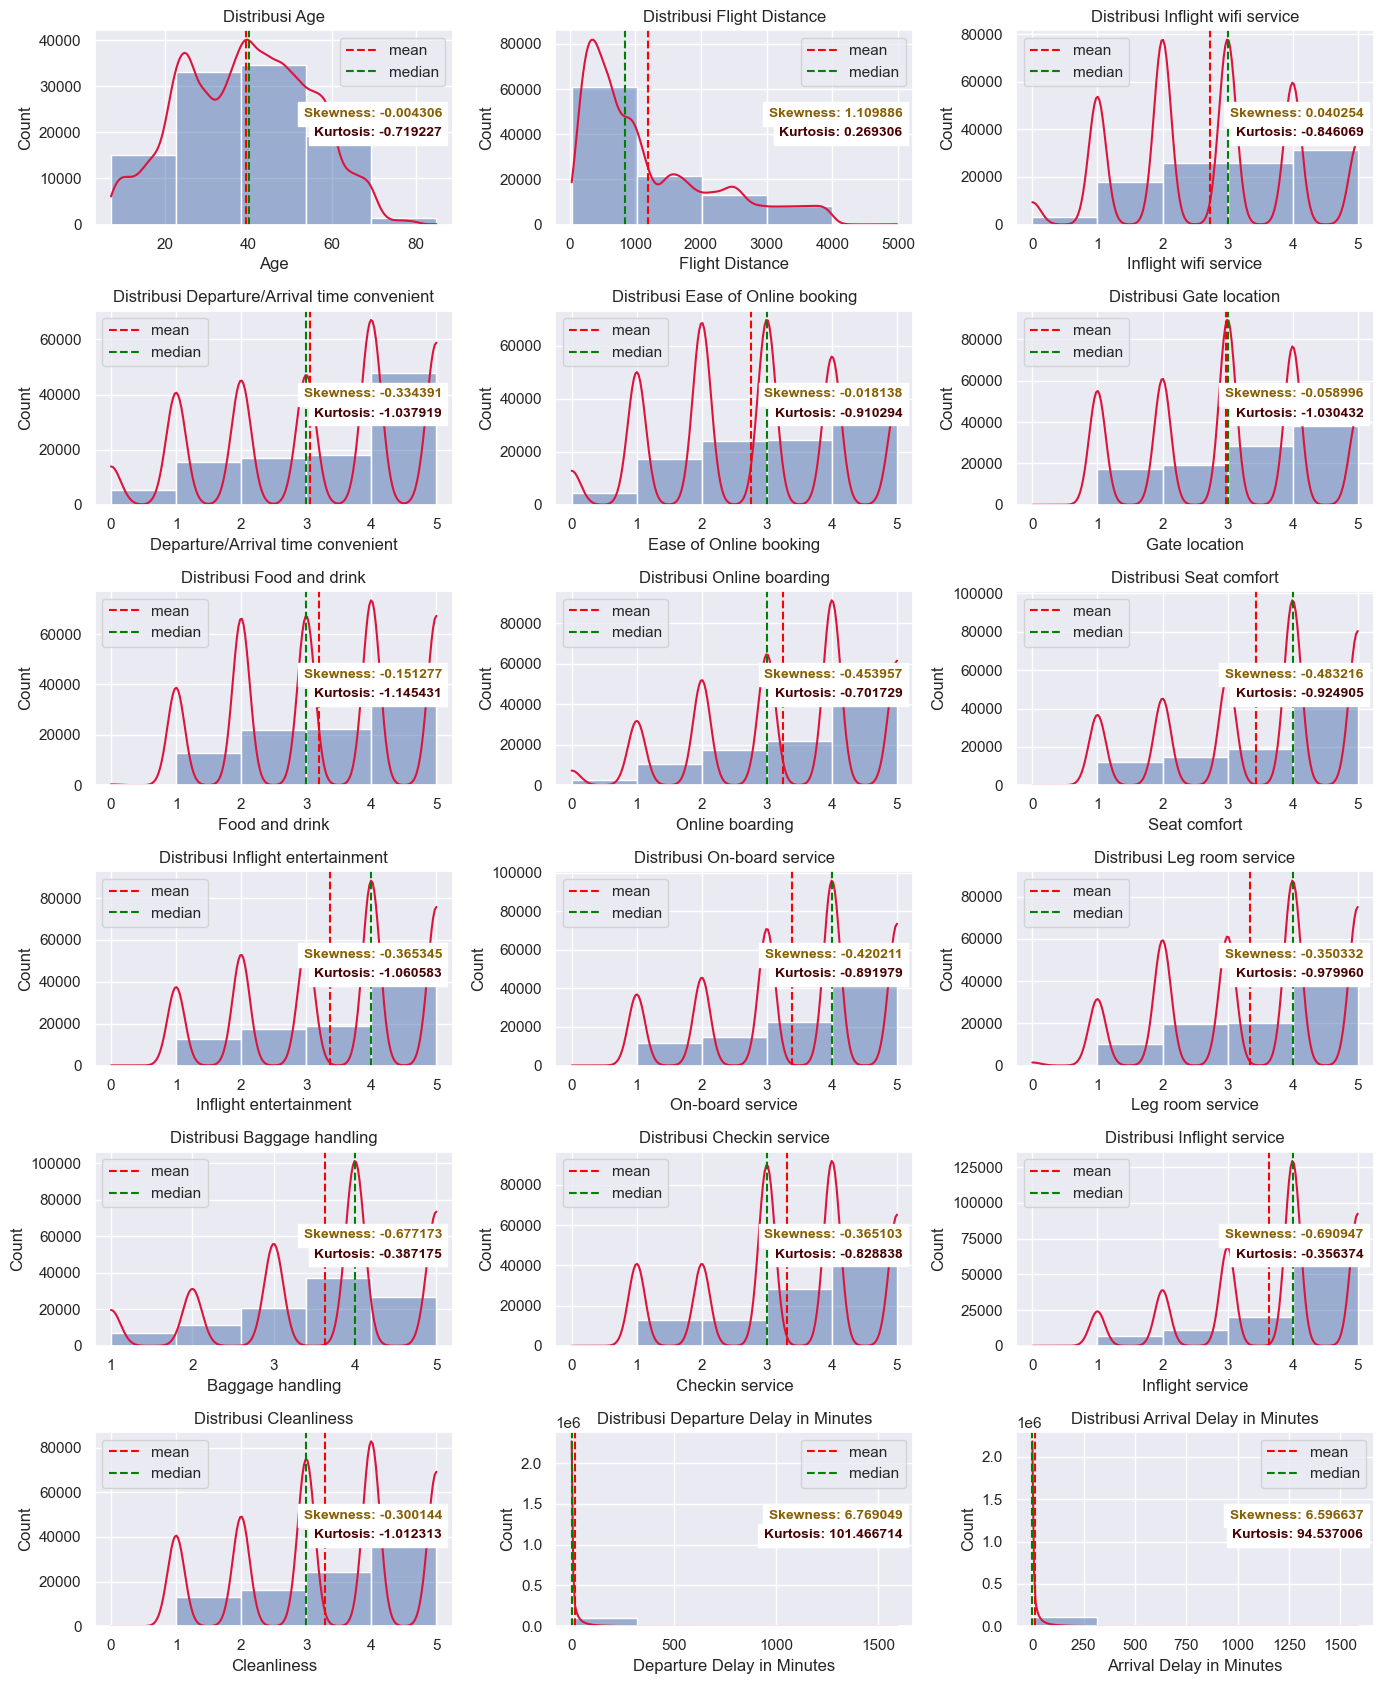

In [20]:
def plot_dist_num_col(df,row_num,col_num,scaled_num_col,figsize):
    # plot distribusi kolom numerik
    fig, axes= plt.subplots(row_num,col_num, figsize=figsize)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.8)
    x=0
    for i in range(row_num):
        for j in range(col_num):
            sns.histplot(ax=axes[i][j], data=df[scaled_num_col[x]], kde=True, bins=5)
            axes[i][j].set_title(titles[x])
            axes[i][j].lines[0].set_color('crimson')
            axes[i][j].axvline(df[scaled_num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
            axes[i][j].axvline(df[scaled_num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
            axes[i][j].legend()
            axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[scaled_num_col[x]].skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:poo brown')
            axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[scaled_num_col[x]].kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:dried blood')
            x+=1
    plt.tight_layout()

# plot all distribution for numerical data
plot_dist_num_col(df=df_train,row_num=6,col_num=3,scaled_num_col=scaled_num_col,figsize=(14,17))

Hanya fitur Age yang terlihat jelas terdistribusi normal, dari distribusi diatas terlihat sekilas tidak banyak yang melaporkan angka 0 atau 1 sebagai tingkat kepuasan pada service selama penerbangan malah sebaliknya, banyak distribusi score dari nilai 3 hingga 5. Namun fakta target class `satisfied` jumlahnya lebih sedikit. Sulit dipastikan bahwa penumpang merasa tidak puas karena target class netral dan tidak puas tergabung menjadi satu kelompok.

## Feature Selection

### Phi_K Correlation Test

interval columns not set, guessing: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


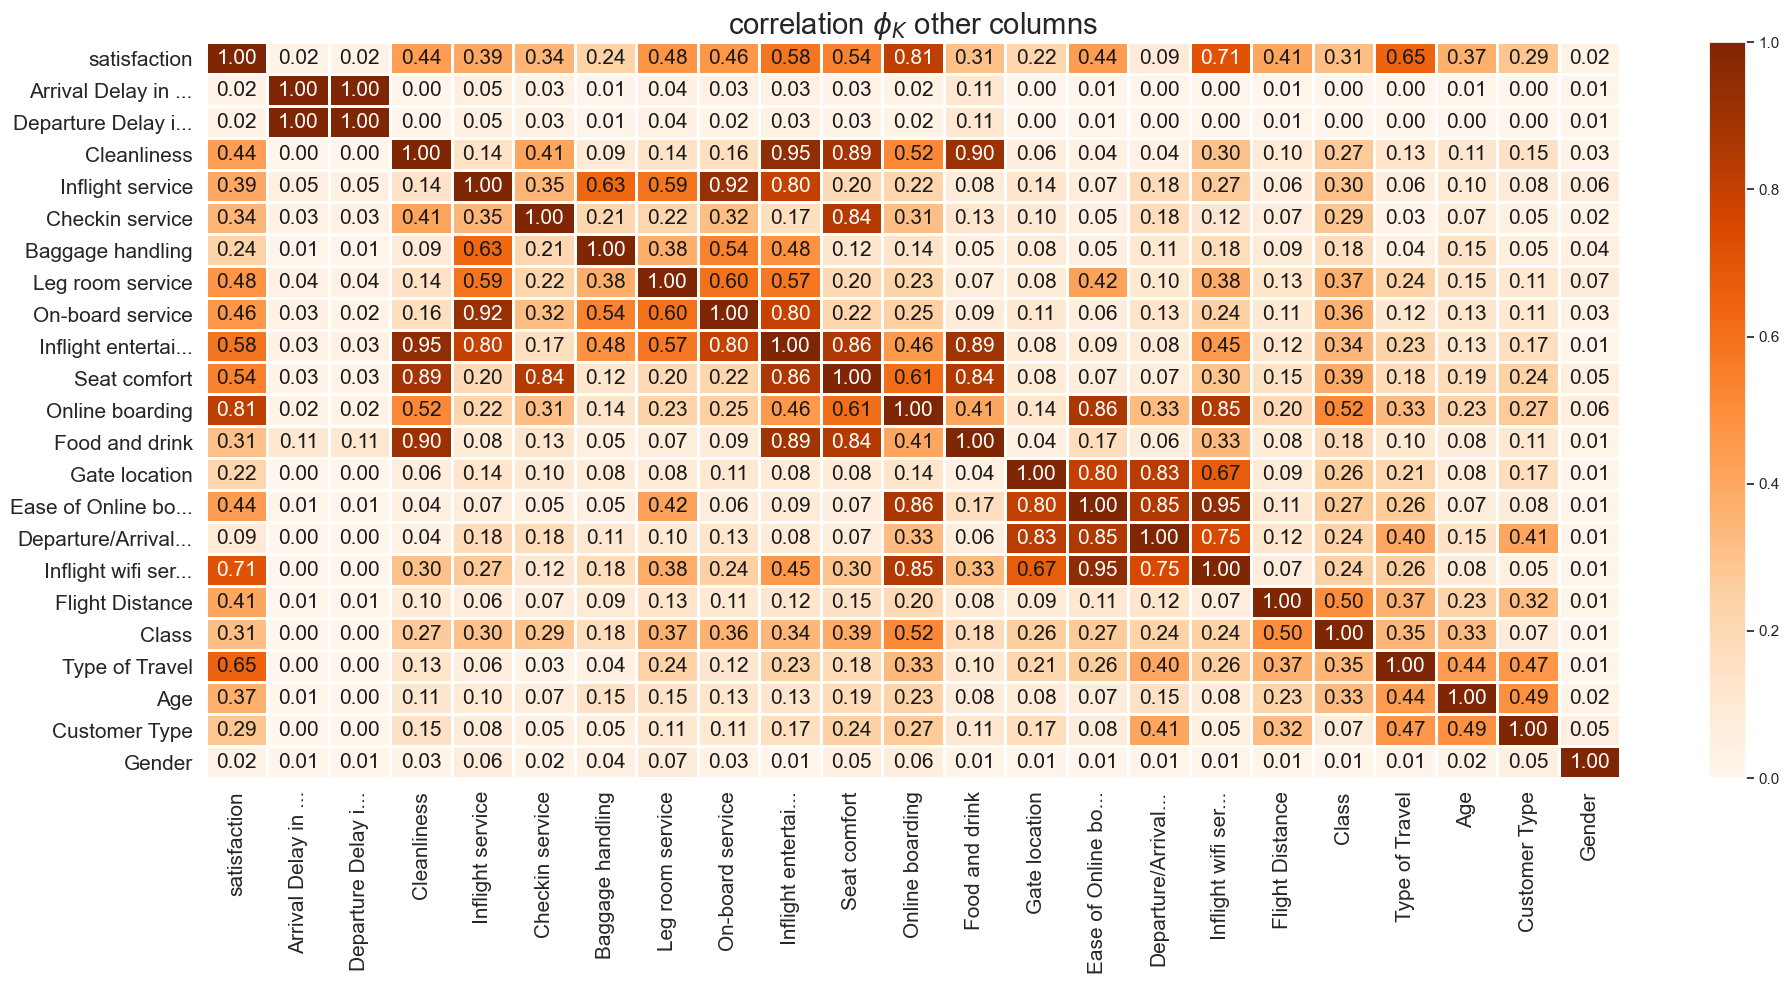

In [21]:
# get the phi_k correlation matrix between all variables
phik_matrix = df_train.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="Oranges", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()
# sns.heatmap(phik_matrix, annot= True, vmin=0, vmax=1, cmap='Accent', figsize=(12,8))

In [22]:
# cek korelasi yang memiliki signifikansi terhadap death_event
df_train.phik_matrix().satisfaction.sort_values(ascending=False)

interval columns not set, guessing: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


satisfaction                         1.000000
Online boarding                      0.813996
Inflight wifi service                0.712240
Type of Travel                       0.648212
Inflight entertainment               0.581873
Seat comfort                         0.537658
Leg room service                     0.476262
On-board service                     0.461403
Ease of Online booking               0.438823
Cleanliness                          0.435308
Flight Distance                      0.406162
Inflight service                     0.392035
Age                                  0.370337
Checkin service                      0.344942
Class                                0.313564
Food and drink                       0.310622
Customer Type                        0.290298
Baggage handling                     0.235647
Gate location                        0.215366
Departure/Arrival time convenient    0.091161
Gender                               0.018754
Arrival Delay in Minutes          

Berdasarkan metrik 𝜙 k (Phik), terlihat ada semua fitur relatif signifikan berkorelasi dengan tingkat kepuasan dalam penerbangan.

# Data Preprocessing
## Train-Test Split
Dataset sudah mengandung test-set, maka penulis tidak melakukan splitting lagi.

In [23]:
#assign data train & data test
data_train, data_test = df_train, df_test

print(f'train size: {data_train.shape}')
print(f'test size: {data_test.shape}')

train size: (103594, 23)
test size: (25883, 23)


In [24]:
# menampilkan 5 data fitur teratas
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Outlier Handling
Outlier handling akan dilakukan pada fitur numerikal kontinu dengan melihat distribusi dan outliernya terlebih dahulu. Untuk outlier dibawah 5% akan dilakukan trimming, untuk outlier diatas 5% akan dilakukan censoring/capping.

In [25]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5, orient='h')
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [26]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

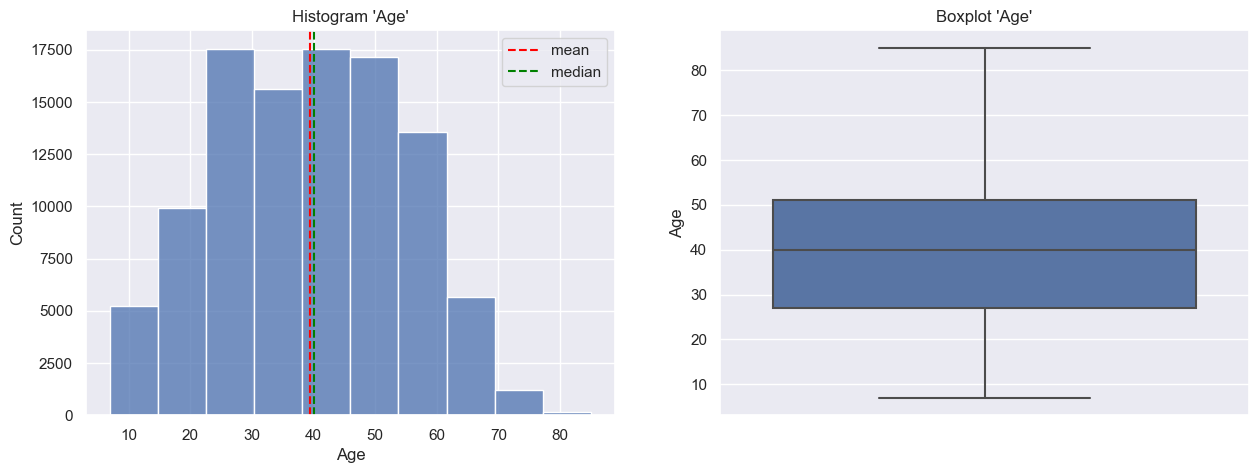

Age Kurtosis: -0.7192266193894041
Age Skewness: -0.004306340610107227
Columns 'Age' is normally distributed


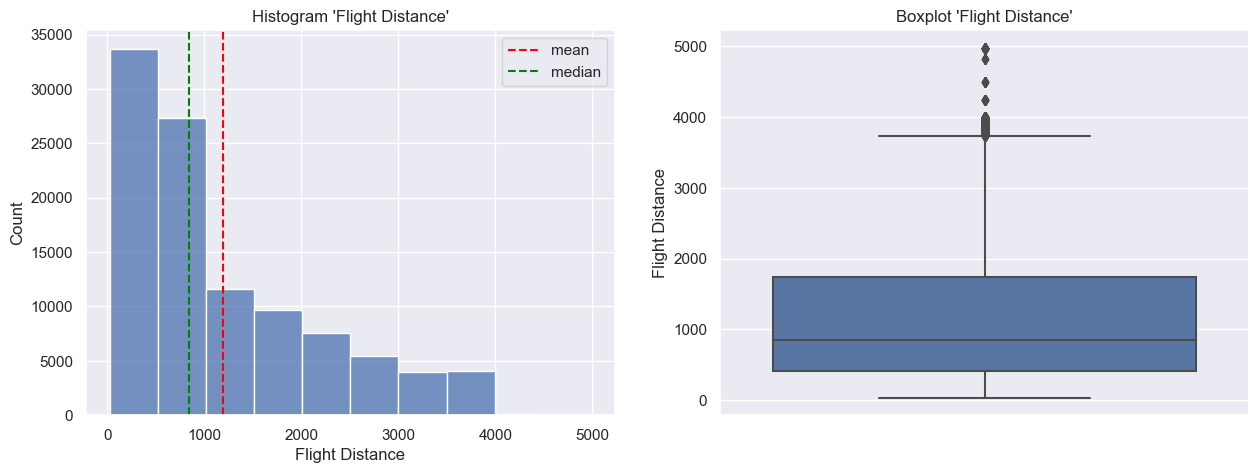

Flight Distance Kurtosis: 0.2693064358604498
Flight Distance Skewness: 1.1098858236331697
Columns 'Flight Distance' is highly right skewed


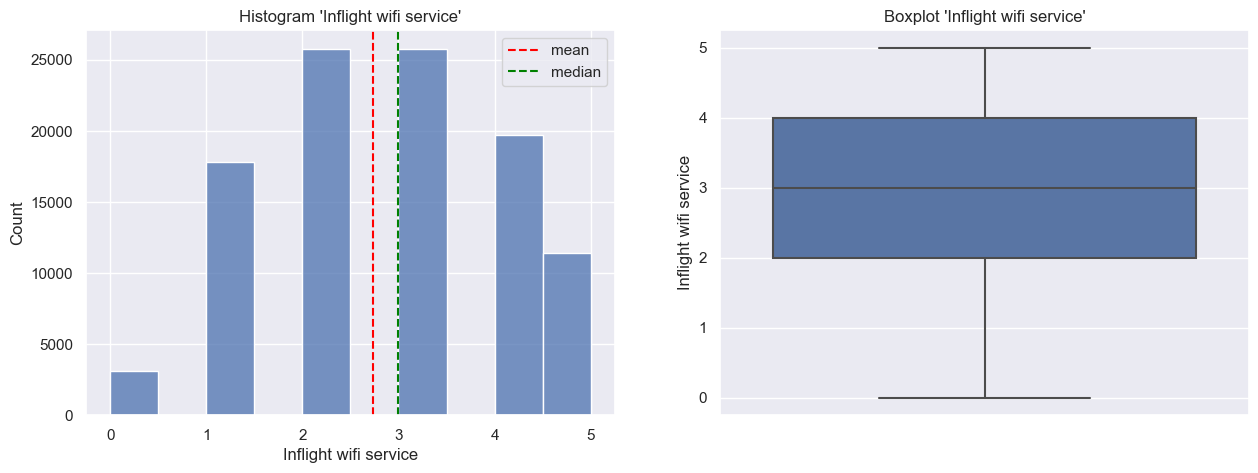

Inflight wifi service Kurtosis: -0.8460688949836781
Inflight wifi service Skewness: 0.040254139756614384
Columns 'Inflight wifi service' is normally distributed


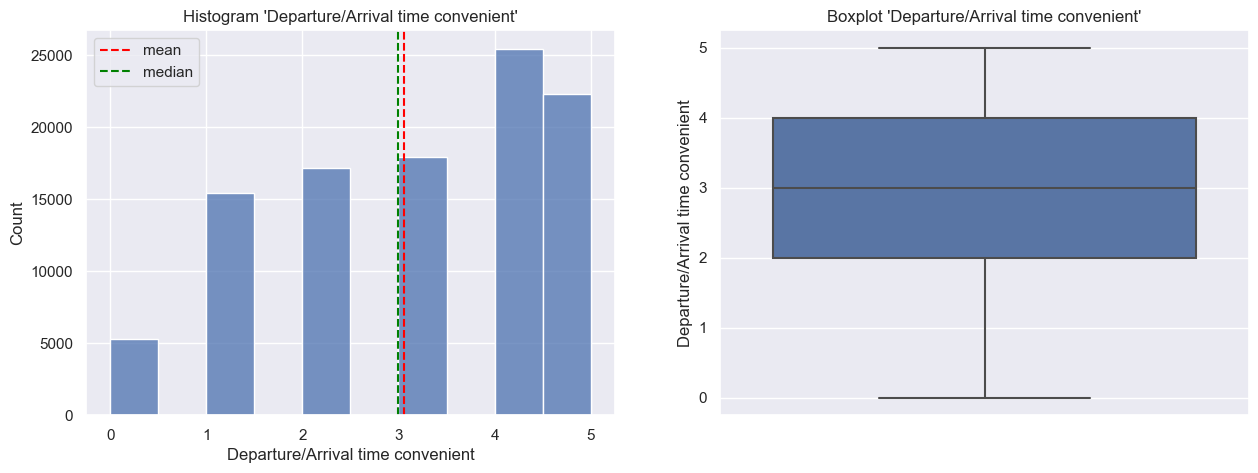

Departure/Arrival time convenient Kurtosis: -1.0379191402038161
Departure/Arrival time convenient Skewness: -0.3343909586720022
Columns 'Departure/Arrival time convenient' is normally distributed


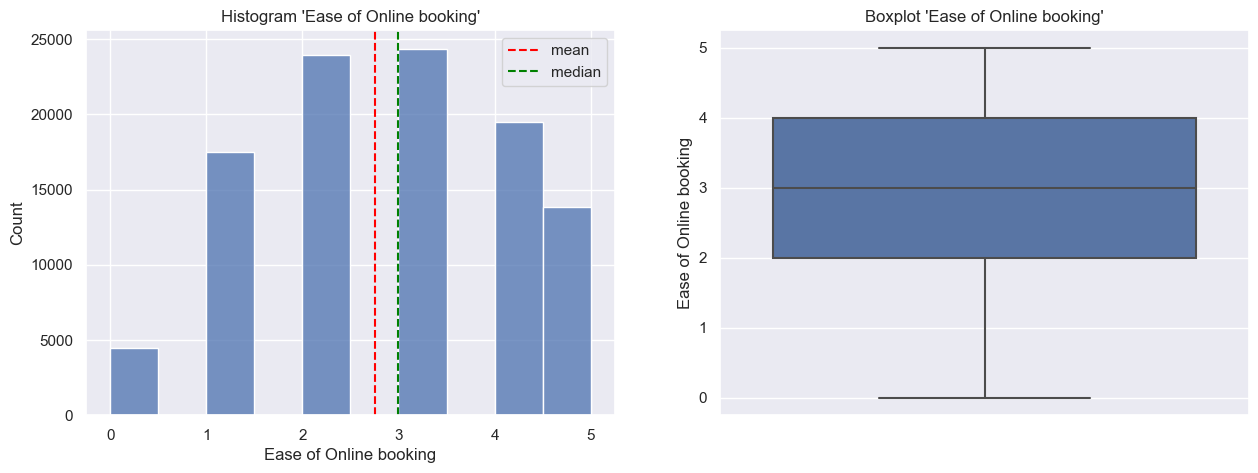

Ease of Online booking Kurtosis: -0.9102943139572619
Ease of Online booking Skewness: -0.01813828640258743
Columns 'Ease of Online booking' is normally distributed


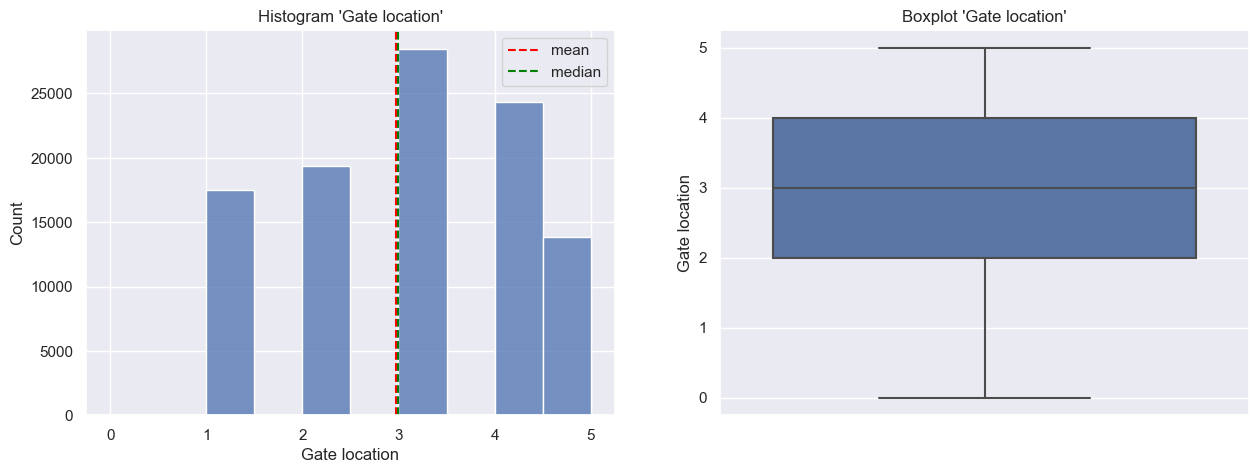

Gate location Kurtosis: -1.0304324381469143
Gate location Skewness: -0.0589956066792809
Columns 'Gate location' is normally distributed


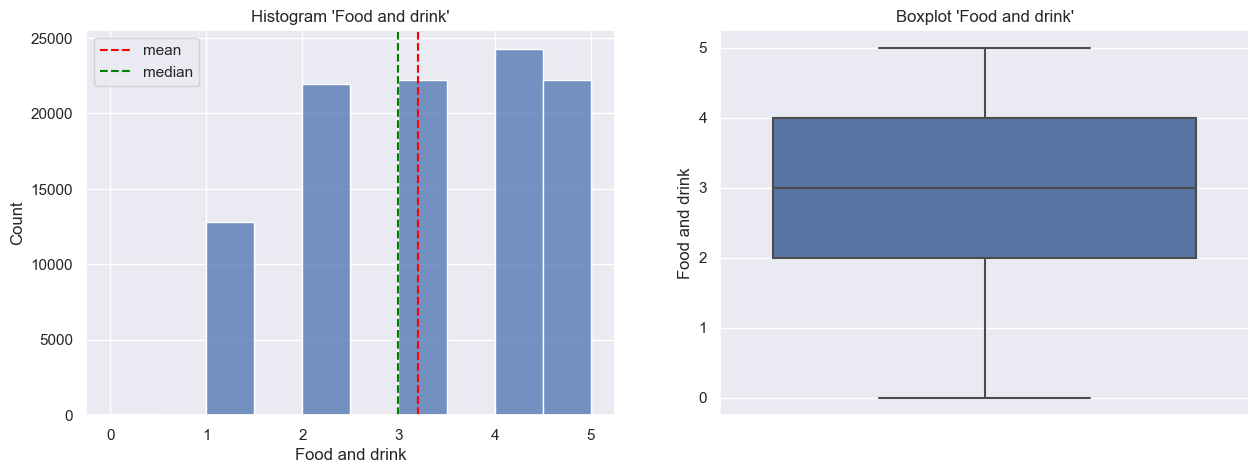

Food and drink Kurtosis: -1.145430981288794
Food and drink Skewness: -0.15127739455319095
Columns 'Food and drink' is normally distributed


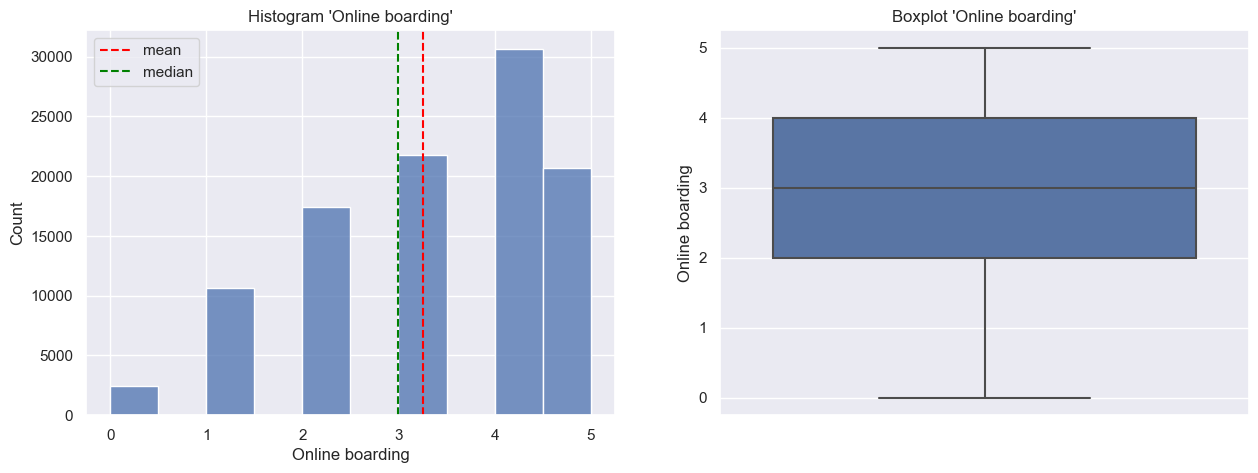

Online boarding Kurtosis: -0.7017290215798382
Online boarding Skewness: -0.45395668634715935
Columns 'Online boarding' is normally distributed


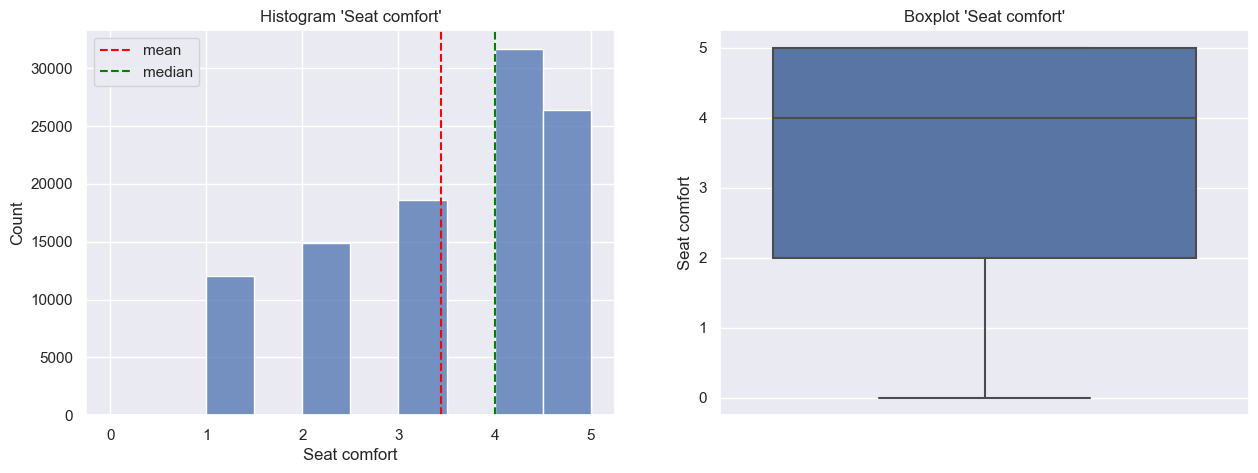

Seat comfort Kurtosis: -0.924904544470114
Seat comfort Skewness: -0.4832160731115689
Columns 'Seat comfort' is normally distributed


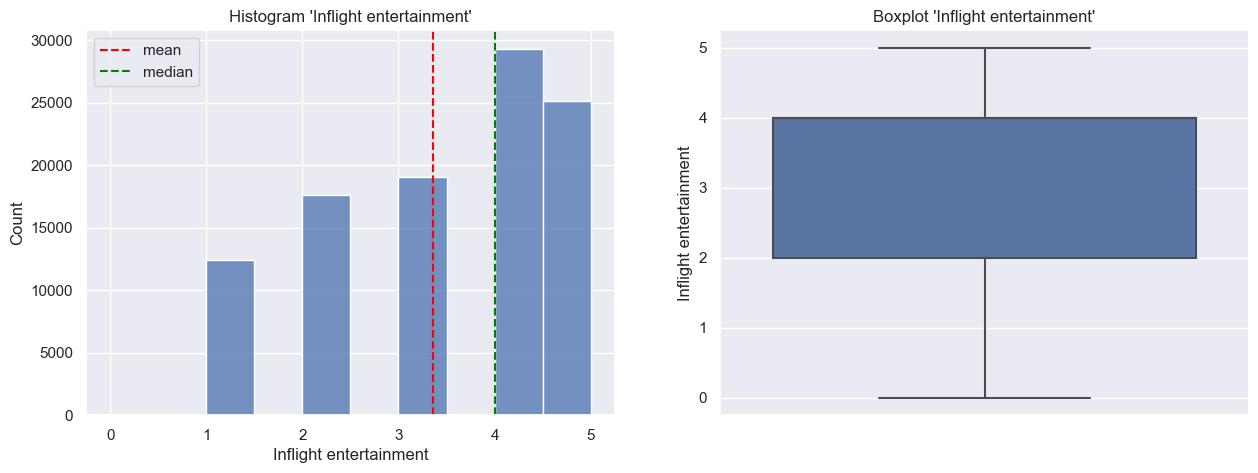

Inflight entertainment Kurtosis: -1.0605831339458278
Inflight entertainment Skewness: -0.36534472679746754
Columns 'Inflight entertainment' is normally distributed


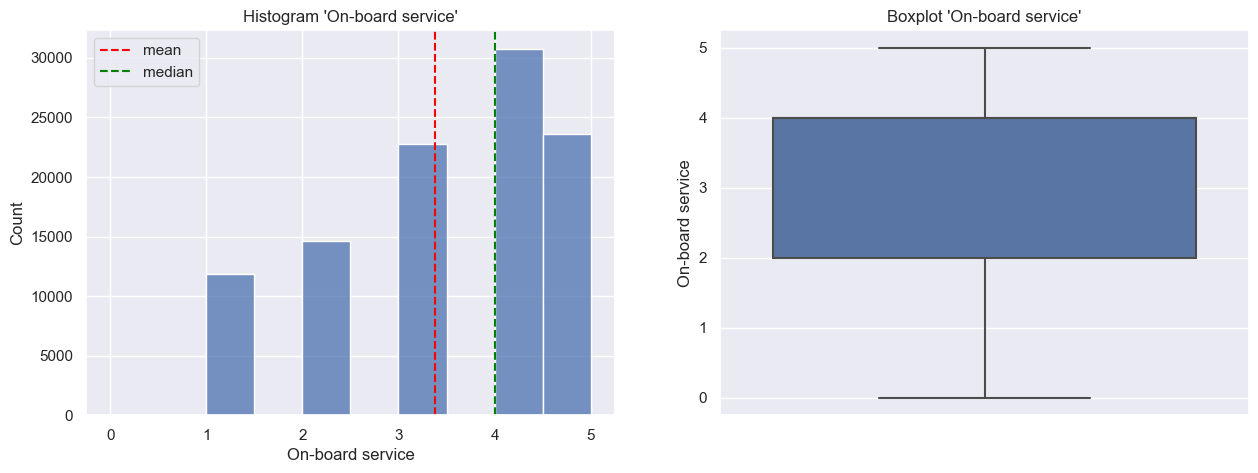

On-board service Kurtosis: -0.8919790817041267
On-board service Skewness: -0.42021113872191707
Columns 'On-board service' is normally distributed


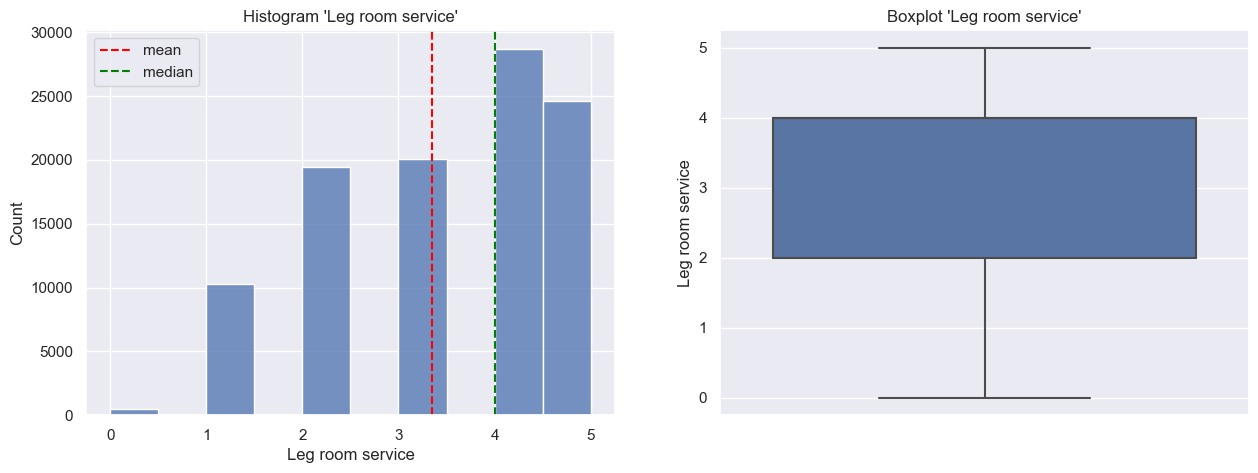

Leg room service Kurtosis: -0.979960384992876
Leg room service Skewness: -0.35033155732431576
Columns 'Leg room service' is normally distributed


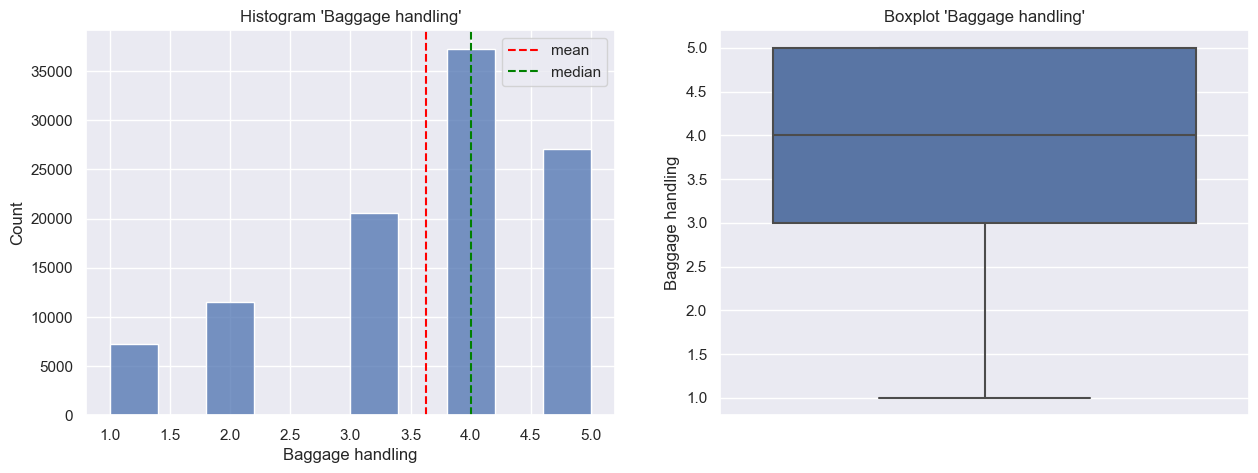

Baggage handling Kurtosis: -0.3871749343343227
Baggage handling Skewness: -0.677173248064704
Columns 'Baggage handling' is moderately left skewed


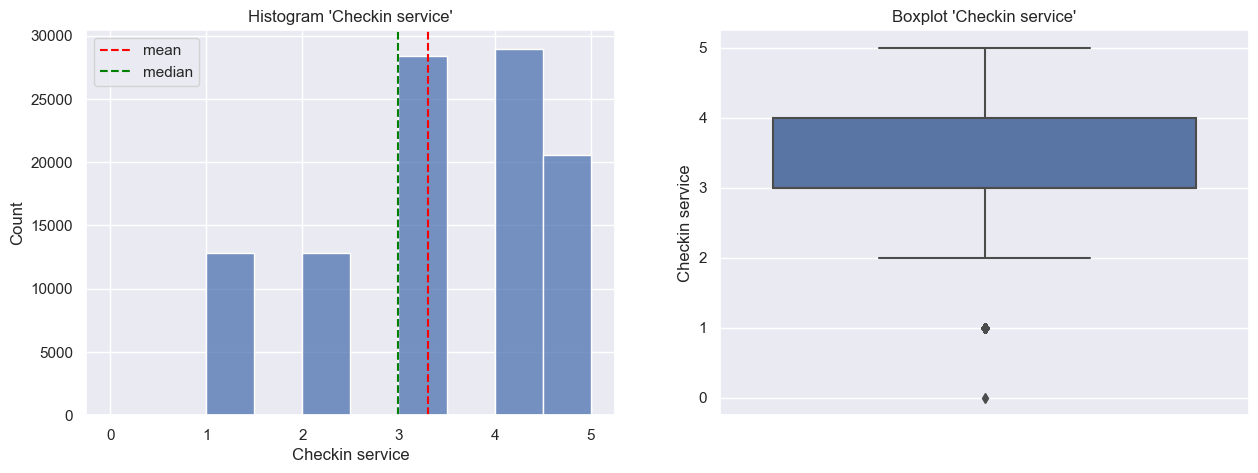

Checkin service Kurtosis: -0.8288376030663551
Checkin service Skewness: -0.3651025926415937
Columns 'Checkin service' is normally distributed


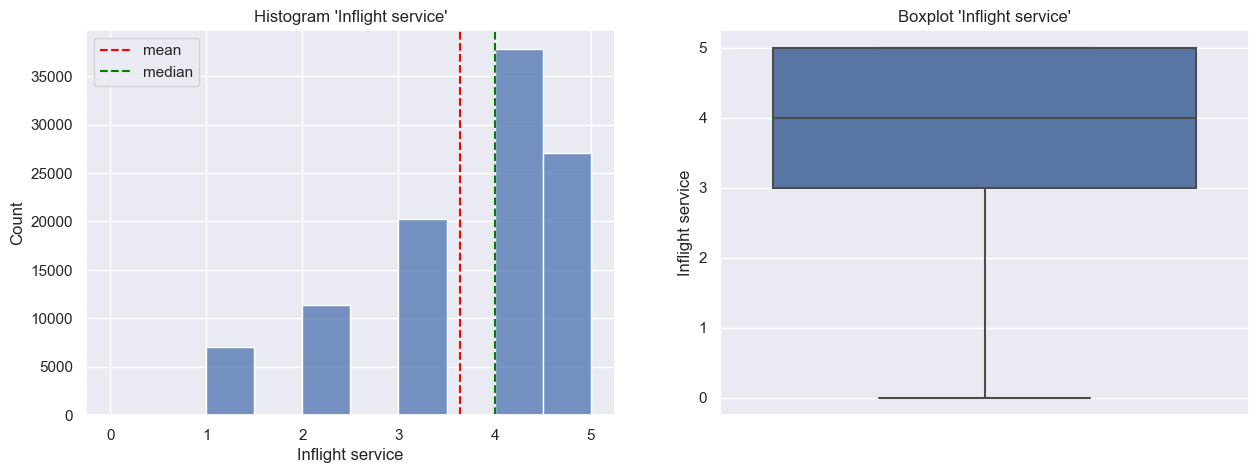

Inflight service Kurtosis: -0.356374133164612
Inflight service Skewness: -0.6909466329010714
Columns 'Inflight service' is moderately left skewed


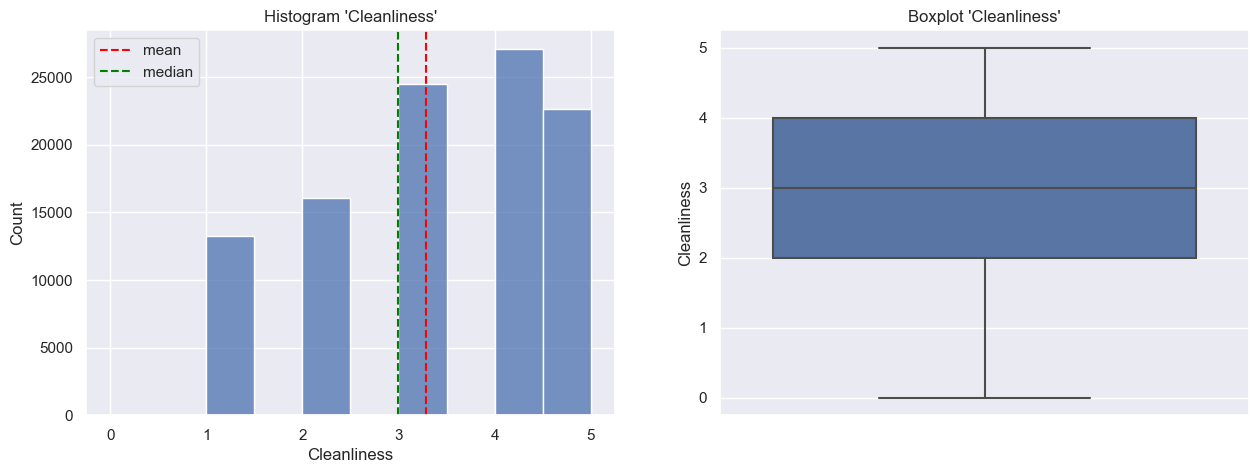

Cleanliness Kurtosis: -1.0123132753040494
Cleanliness Skewness: -0.3001444899385827
Columns 'Cleanliness' is normally distributed


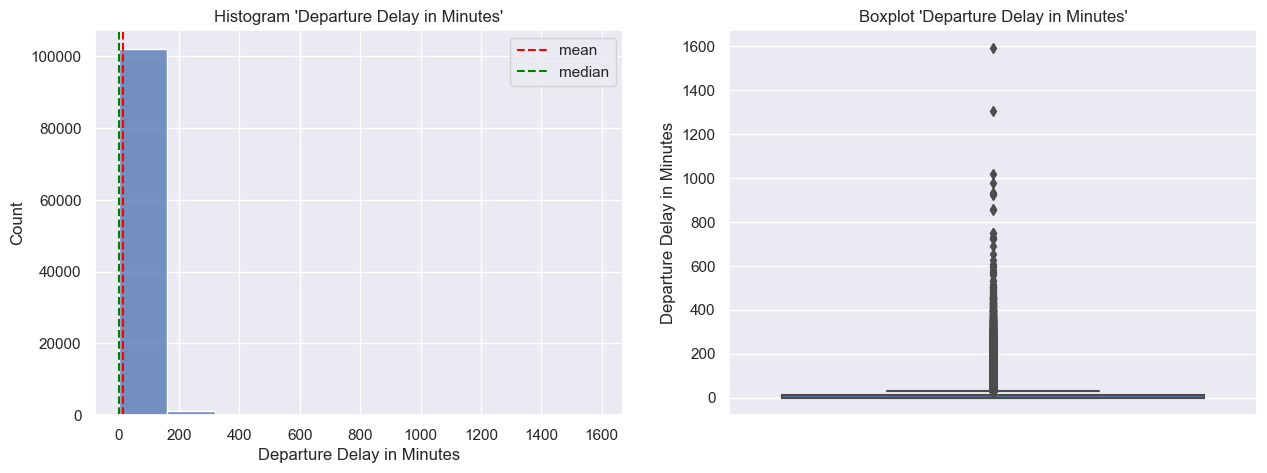

Departure Delay in Minutes Kurtosis: 101.46671443865606
Departure Delay in Minutes Skewness: 6.769048944816573
Columns 'Departure Delay in Minutes' is highly right skewed


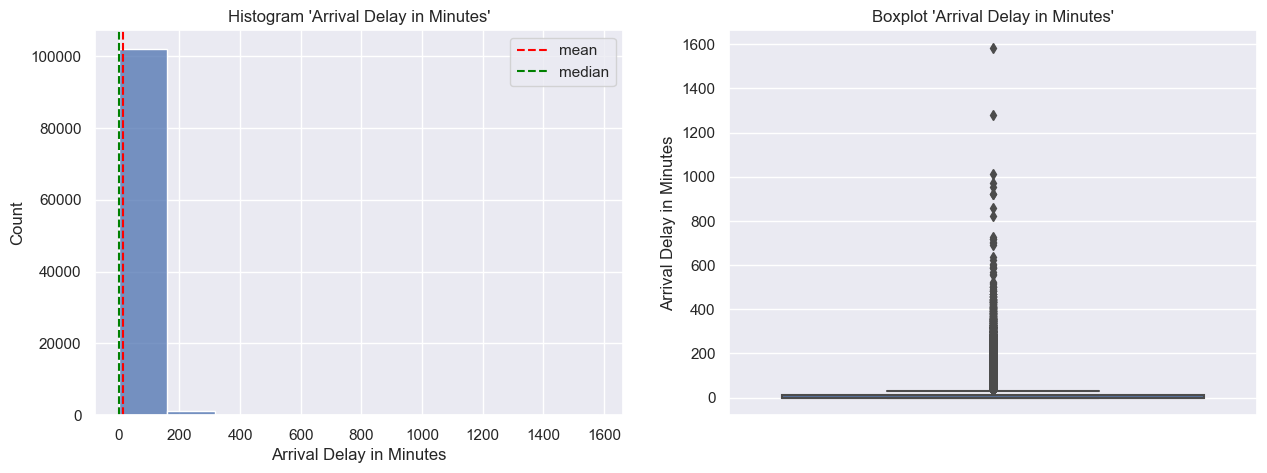

Arrival Delay in Minutes Kurtosis: 94.53700550306654
Arrival Delay in Minutes Skewness: 6.596636807462695
Columns 'Arrival Delay in Minutes' is highly right skewed


In [27]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(scaled_num_col)):
    plot_diagnostic(data_train, scaled_num_col[i])

In [28]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

In [29]:
# simpan value upper dan lower ke dalam list yang sudah dibuat sebelumnya
for i in range(len(scaled_num_col)):
    upper_, lower_ = find_skewed_boundaries(df=data_train, variable=scaled_num_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

# simpan value upper dan lower ke dictionary sesuai nama fiturnya dengan format (nama_fitur: upper,lower)
low_up_dict = {}
for i in range(len(scaled_num_col)):
    low_up_dict[scaled_num_col[i]]=[lower[i],upper[i]]

In [30]:
# menampilan dicionary lower dan upper limit value suatu fitur
low_up_dict

{'Age': [-9.0, 87.0],
 'Flight Distance': [-1579.5, 3736.5],
 'Inflight wifi service': [-1.0, 7.0],
 'Departure/Arrival time convenient': [-1.0, 7.0],
 'Ease of Online booking': [-1.0, 7.0],
 'Gate location': [-1.0, 7.0],
 'Food and drink': [-1.0, 7.0],
 'Online boarding': [-1.0, 7.0],
 'Seat comfort': [-2.5, 9.5],
 'Inflight entertainment': [-1.0, 7.0],
 'On-board service': [-1.0, 7.0],
 'Leg room service': [-1.0, 7.0],
 'Baggage handling': [0.0, 8.0],
 'Checkin service': [1.5, 5.5],
 'Inflight service': [0.0, 8.0],
 'Cleanliness': [-1.0, 7.0],
 'Departure Delay in Minutes': [-18.0, 30.0],
 'Arrival Delay in Minutes': [-19.5, 32.5]}

In [31]:
#list containing outliers percentage
trimmed_outliers = []
censored_outliers = []
# menghitung dan menampilkan persentase outlier dari tiap fitur
for i in range(len(scaled_num_col)):
    num_outlier = data_train[scaled_num_col[i]][(data_train[scaled_num_col[i]] > upper[i]) | (data_train[scaled_num_col[i]] < lower[i])].shape[0]
    outlier_percentage = num_outlier/data_train.shape[0]*100
    if outlier_percentage==0:
        pass
    elif (outlier_percentage>0.0 and outlier_percentage<=5.0):
        trimmed_outliers.append([scaled_num_col[i],outlier_percentage])
    else:
        censored_outliers.append([scaled_num_col[i],outlier_percentage])

print("Trimmed Outliers Consideration:")
for i in trimmed_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

print("Censored Outliers Consideration:")
for i in censored_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

Trimmed Outliers Consideration:
	Percentage of outlier in Flight Distance is 2.21%
Censored Outliers Consideration:
	Percentage of outlier in Checkin service is 12.41%
	Percentage of outlier in Departure Delay in Minutes is 13.93%
	Percentage of outlier in Arrival Delay in Minutes is 13.47%


Outlier pada `Flight Distance` relatif sedikit maka akan di trim, sedangkan outlier pada `Checkin service`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` yang berjulah relatif banyak akan di cap.

### Trimming

In [32]:
# get outlier index in respective column
flight_distance_outlier_index = data_train['Flight Distance'][(data_train['Flight Distance'] < low_up_dict['Flight Distance'][0]) | (data_train['Flight Distance'] > low_up_dict['Flight Distance'][1])].index

# drop the outlier
data_train.drop(index=flight_distance_outlier_index, inplace=True)

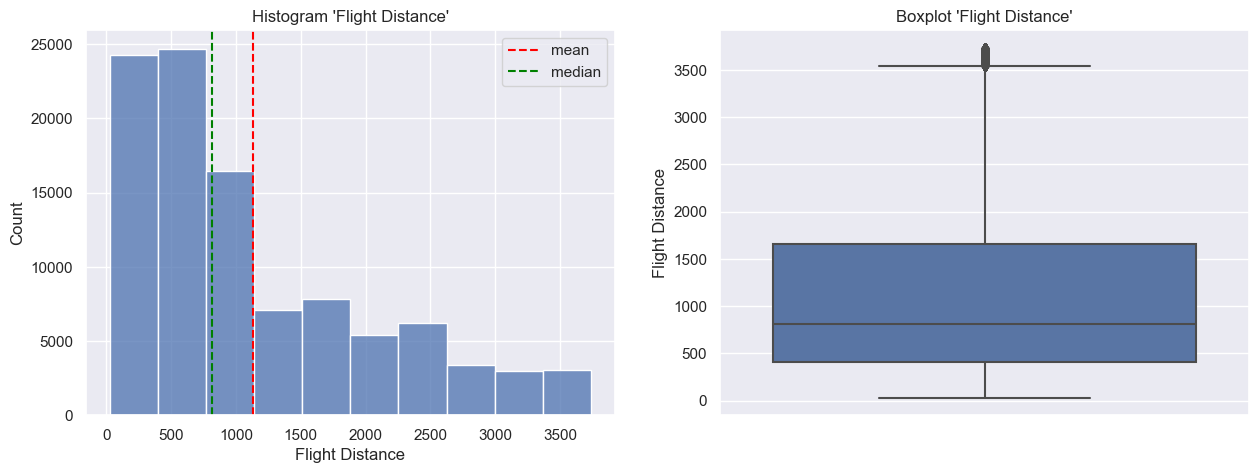

Flight Distance Kurtosis: 0.15025334027868098
Flight Distance Skewness: 1.0659866148441235
Columns 'Flight Distance' is highly right skewed

Skewness Value :  1.0659866148441235


In [33]:
# fitur serum_sodium setelah dilakukan trimming
plot_diagnostic(data_train, 'Flight Distance')
print('\nSkewness Value : ', data_train['Flight Distance'].skew())

### Censoring/Capping

In [34]:
# define kolom yang ingin di cap
capped_col = [i[0] for i in censored_outliers]

# Create the capper
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=capped_col)

# melakukan capping pada data train
data_train = windsoriser.fit_transform(data_train)

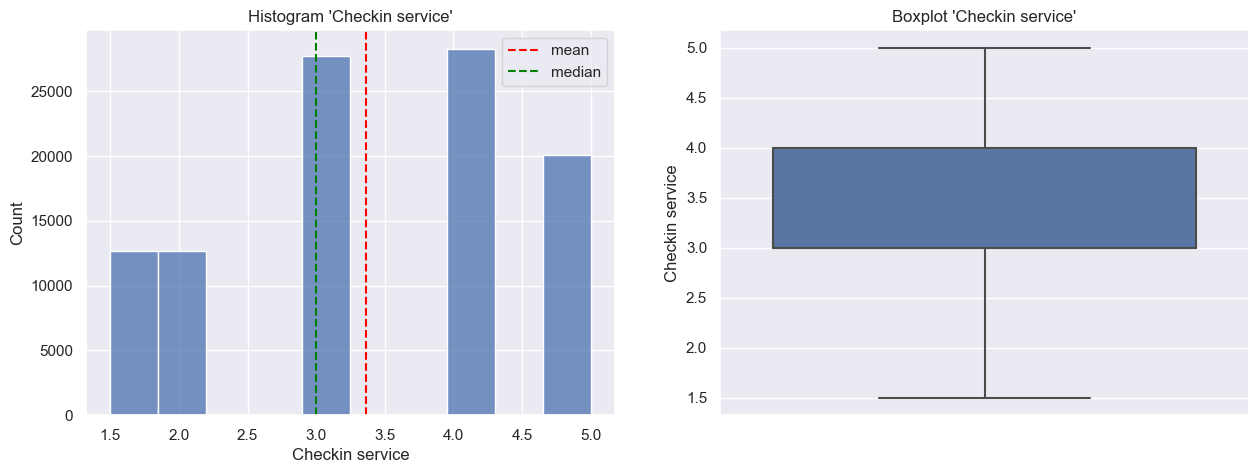

Checkin service Kurtosis: -1.116228247224438
Checkin service Skewness: -0.1250042310816015
Columns 'Checkin service' is normally distributed


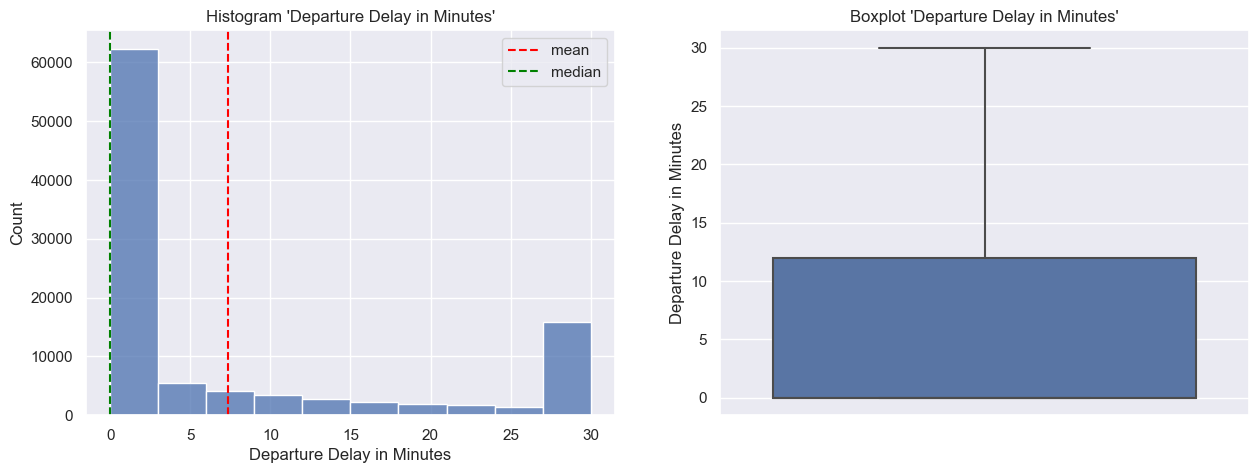

Departure Delay in Minutes Kurtosis: -0.18474913783658575
Departure Delay in Minutes Skewness: 1.2209113385968513
Columns 'Departure Delay in Minutes' is highly right skewed


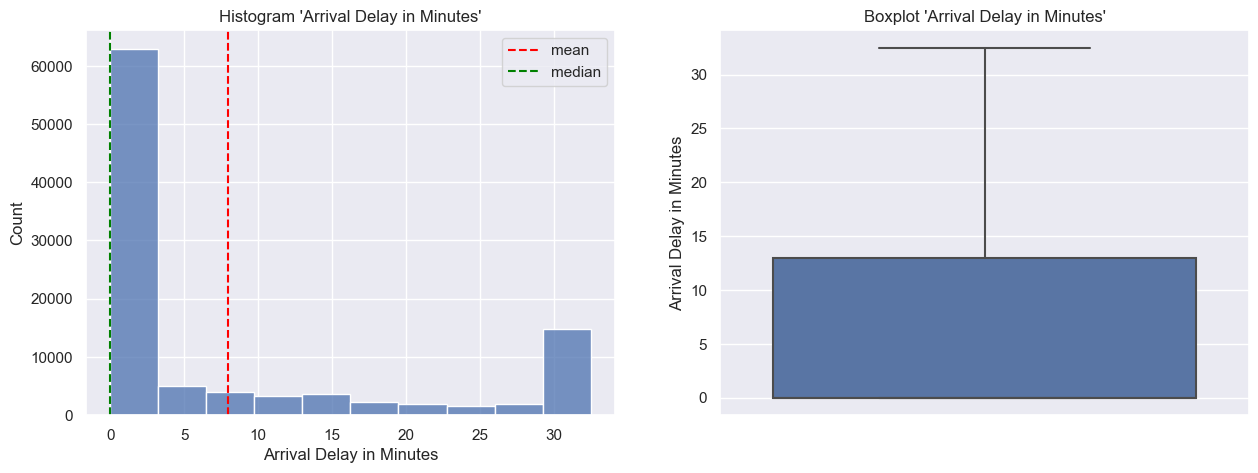

Arrival Delay in Minutes Kurtosis: -0.12683767937928447
Arrival Delay in Minutes Skewness: 1.230962438407682
Columns 'Arrival Delay in Minutes' is highly right skewed


In [35]:
# plot fitur setelah dilakukkan capping
for i in range(len(capped_col)):
    plot_diagnostic(data_train, capped_col[i])

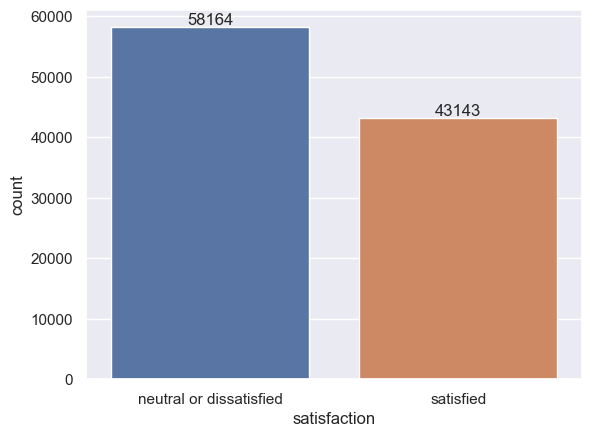

In [36]:
# plot target class comparison
ax = sns.countplot(x=data_train.satisfaction, data=data_train)
ax.bar_label(ax.containers[0])
plt.show()

In [37]:
# original train-test set tanpa class imbalance handling
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
X_test  = data_test.iloc[:,:-1]
y_test  = data_test.iloc[:,-1]

## Class Imbalance Handling
Pendekatan yang dilakukan untuk class imbalance handling adalah *`Undersampling`* majority class dengan pertimbangan jumlah entri data masih cukup banyak untuk kedua target class.

In [38]:
satisfied = data_train[data_train.satisfaction=='satisfied'] # minority class
neutral_or_dissatisfied = data_train[data_train.satisfaction=='neutral or dissatisfied'] # majority

# undersample majority class
neutral_or_dissatisfied = neutral_or_dissatisfied.sample(n=len(satisfied), random_state=42)
data_train_balanced = pd.concat([satisfied,neutral_or_dissatisfied],axis=0)

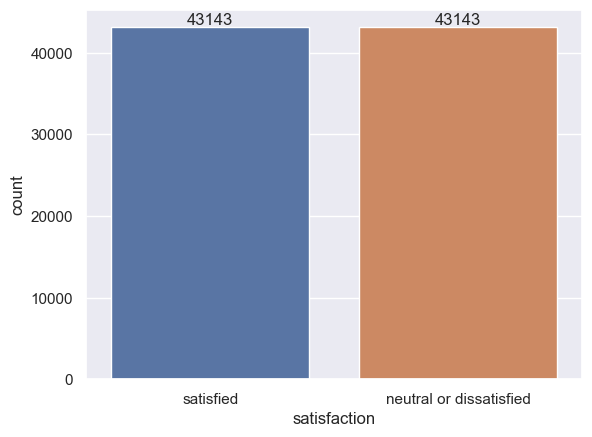

In [39]:
# plot balanced data train
ax = sns.countplot(x=data_train_balanced.satisfaction, data=data_train_balanced)
ax.bar_label(ax.containers[0])
plt.show()

In [40]:
# shuffle balanced data train
data_train_balanced = shuffle(data_train_balanced,random_state=42)
data_train_balanced.reset_index(drop=True,inplace=True)

In [41]:
# show balanced data train
data_train_balanced.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,18,Personal Travel,Eco,460,4,5,4,2,3,4,3,3,2,4,5,2.0,5,3,0.0,0.0,neutral or dissatisfied
1,Male,Loyal Customer,58,Business travel,Business,588,5,5,5,5,4,5,4,5,5,5,5,5.0,5,4,19.0,21.0,satisfied
2,Male,Loyal Customer,11,Personal Travel,Eco,213,1,0,1,3,2,1,2,2,4,4,5,5.0,5,2,0.0,32.5,neutral or dissatisfied
3,Female,Loyal Customer,32,Business travel,Business,1899,4,4,4,4,5,5,4,5,1,4,2,5.0,5,5,0.0,0.0,satisfied
4,Male,Loyal Customer,56,Business travel,Business,363,3,3,3,3,3,2,2,5,5,5,5,2.0,5,5,0.0,0.0,satisfied


In [42]:
# balanced train-test set tanpa class imbalance handling
X_train_balanced = data_train_balanced.drop(columns='satisfaction')
y_train_balanced = data_train_balanced['satisfaction']

## Pipelining
### Scaling & Encoding
- Scaling akan dilakukan dengan *`minmax scaler`* dengan pertimbangan banyak data yang tidak terdistribusi normal. 
- Encoding akan dilakukan pada data kategorikal, untuk data dengan 2 unique values dan yang memiliki `orde/tingkatan` maka akan di encode dengan `OrdinalEncoder`, selain itu akan menggunakan `one-hot encoder`.
- Penulis akan membungkus fungsi scaling ini kedalam column transformer dengan variabel bernama *`preprocessor`*

In [43]:
# show n unique values
data_train[cat_col].nunique()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64

In [44]:
# show unique values
data_train.Class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [45]:
# normal ordinal encoder
encoded_cat_col1 = cat_col[:-2]
encoded_cat_col1

['Gender', 'Customer Type', 'Type of Travel']

In [46]:
#mendefinisikan kolom/fitur numerik yang akan di transform
num_transformer = MinMaxScaler()
cat_transformer = OrdinalEncoder()
cat_transformer_class = OrdinalEncoder(categories=[['Eco','Eco Plus','Business']])

 
# membuat pipeline data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat1", cat_transformer, encoded_cat_col1), 
        ("cat2", cat_transformer_class, ['Class']),
        ("num", num_transformer, num_col),
    ],
    remainder='passthrough'
)

### Model Definition
Model yang akan digunakan adalah: `Logistic Regression`,`GradientBoost`,`XGBoost`, dan `CatBoost`.

In [47]:
data_train_balanced

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,18,Personal Travel,Eco,460,4,5,4,2,3,4,3,3,2,4,5,2.0,5,3,0.0,0.0,neutral or dissatisfied
1,Male,Loyal Customer,58,Business travel,Business,588,5,5,5,5,4,5,4,5,5,5,5,5.0,5,4,19.0,21.0,satisfied
2,Male,Loyal Customer,11,Personal Travel,Eco,213,1,0,1,3,2,1,2,2,4,4,5,5.0,5,2,0.0,32.5,neutral or dissatisfied
3,Female,Loyal Customer,32,Business travel,Business,1899,4,4,4,4,5,5,4,5,1,4,2,5.0,5,5,0.0,0.0,satisfied
4,Male,Loyal Customer,56,Business travel,Business,363,3,3,3,3,3,2,2,5,5,5,5,2.0,5,5,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86281,Female,Loyal Customer,29,Business travel,Business,1916,3,3,3,3,5,5,5,5,5,5,4,5.0,4,5,0.0,0.0,satisfied
86282,Male,Loyal Customer,18,Personal Travel,Eco Plus,140,2,1,2,3,3,2,2,3,2,2,2,2.0,3,3,0.0,0.0,neutral or dissatisfied
86283,Male,Loyal Customer,70,Personal Travel,Eco,1119,1,4,1,4,4,1,4,4,4,3,5,3.0,4,4,0.0,0.0,neutral or dissatisfied
86284,Male,Loyal Customer,45,Business travel,Business,3469,4,4,4,4,2,5,5,4,4,4,4,3.0,4,3,0.0,0.0,satisfied


In [48]:
# instansiasi classifier dengan default parameter
log_model = LogisticRegression(random_state=42)
gbc_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(verbosity=0)
catb_model = CatBoostClassifier(random_state=42, verbose=False)

### Dengan Pipeline Preprocessor
Berikut adalah pipeline untuk setiap classifier

In [49]:
# contruct data training pipeline (preprocessing + model fitting)
log_pipe = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",log_model)
    ]
)
gbc_pipe = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",gbc_model)
    ]
)
xgb_pipe = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",xgb_model)
    ]
)
catb_pipe = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",catb_model)
    ]
)

## Model Training
Penulis melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan *`cross validation`*. Kemudian model terbaik akan dipilih untuk dilakukan `hyperparameter tuning`, kemudian performa model `sebelum` dan `sesudah` tuning akan di bandingkan.

In [50]:
# train data pada model Logistic Regression
log_pipe.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat1', OrdinalEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('cat2',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('num', MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('estimator', LogisticRegression(random_state=42))])

In [51]:
# train data pada model GradientBoost
gbc_pipe.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat1', OrdinalEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('cat2',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('num', MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('estimator', GradientBoostingClassifier(random_state=42))])

In [52]:
# train data pada model XGBoost
xgb_pipe.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat1', OrdinalEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('cat2',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('num', MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Onlin...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

In [53]:
# train data pada model CatBoost
catb_pipe.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat1', OrdinalEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('cat2',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('num', MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('estimator',
                 <catboost.core.CatBoostClassifier object at 0x14fc76790>)])

## Model Evaluation
Untuk mengevaluasi model, metrik evaluasi yang digunakan adalah `F1-score` dengan teknik *`Cross Validation`*. Pemilihan metrik `F1-score` didasari oleh jumlah target class yang seimbang, pertimbangan kedua adalah ketiadaan urgensi untuk mencari prediksi `false positive` maupun `false negative` namun demikian, penulis tetap ingin model yang dihasilkan mampu mengeneralisir setiap kelas dengan baik.

In [54]:
# set evaluation metric scorer
scorer = make_scorer(f1_score,pos_label='satisfied',average='binary')

In [55]:
#set metric
metric = scorer
n_cv = 5 # cross validation split

# checking cross validation score
cv_log_model = cross_val_score(log_pipe, X_train_balanced, y_train_balanced, cv=n_cv, scoring=metric)
cv_gbc_model = cross_val_score(gbc_pipe, X_train_balanced, y_train_balanced, cv=n_cv, scoring=metric)
cv_xgb_model = cross_val_score(xgb_pipe, X_train_balanced, y_train_balanced, cv=n_cv, scoring=metric)
cv_catb_model = cross_val_score(catb_pipe, X_train_balanced, y_train_balanced, cv=n_cv, scoring=metric)

name_model = []
cv_scores=0
for cv,name in zip([cv_log_model, cv_gbc_model, cv_xgb_model, cv_catb_model],['log_model','gbc_model','xgb_model','catb_model']):
    print(name)
    print(f'f1 - All - Cross Validation  : ', cv)
    print(f'f1 - Mean - Cross Validation : ', cv.mean())
    print(f'f1 - Std - Cross Validation  : ', cv.std())
    print(f'f1 - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
f1 - All - Cross Validation  :  [0.8606644  0.86173446 0.86318014 0.86690901 0.87239386]
f1 - Mean - Cross Validation :  0.8649763703552236
f1 - Std - Cross Validation  :  0.004268108567942571
f1 - Range of Test-Set       :  0.860708261787281 - 0.8692444789231661
--------------------------------------------------
gbc_model
f1 - All - Cross Validation  :  [0.93995448 0.93641416 0.93863238 0.93981129 0.94114209]
f1 - Mean - Cross Validation :  0.9391908791802216
f1 - Std - Cross Validation  :  0.0015998332747732154
f1 - Range of Test-Set       :  0.9375910459054484 - 0.9407907124549948
--------------------------------------------------
xgb_model
f1 - All - Cross Validation  :  [0.95656235 0.95833577 0.96063084 0.95916095 0.95956527]
f1 - Mean - Cross Validation :  0.9588510370760496
f1 - Std - Cross Validation  :  0.0013621636536642293
f1 - Range of Test-Set       :  0.9574888734223853 - 0.9602132007297138
--------------------------------------------------
catb_model
f1 - All -

`CatBoost` dan `XGBoost` mendapat performa yang bagus namun nilai mean f1-score `CatBoost` masih `lebih unggul` sedikit dibandingkan `XGBoost`

In [56]:
# predict test set dengan model logistic regression
y_pred_test_log = log_pipe.predict(X_test)

# predict test set dengan model gradientboost
y_pred_test_gbc = gbc_pipe.predict(X_test)

# predict test set dengan model xgboost
y_pred_test_xgb = xgb_pipe.predict(X_test)

# predict test set dengan model catboost
y_pred_test_catb = catb_pipe.predict(X_test)

# print f1 score 
f1_log = f1_score(y_test,y_pred_test_log,pos_label='satisfied',average='binary')
print(f'Baseline Logistic Regression Model f1 Score test-set\t: {f1_log}')

f1_gbc = f1_score(y_test,y_pred_test_gbc,pos_label='satisfied',average='binary')
print(f'Baseline GradientBoost Model f1 Score test-set\t\t: {f1_gbc}')

f1_xgb = f1_score(y_test,y_pred_test_xgb,pos_label='satisfied',average='binary')
print(f'Baseline XGBoost Model f1 Score test-set\t\t: {f1_xgb}')

f1_catb = f1_score(y_test,y_pred_test_catb,pos_label='satisfied',average='binary')
print(f'Baseline CatBoost Model f1 Score test-set\t\t: {f1_catb}')

Baseline Logistic Regression Model f1 Score test-set	: 0.8388556220891551
Baseline GradientBoost Model f1 Score test-set		: 0.9342359767891684
Baseline XGBoost Model f1 Score test-set		: 0.9561950227644433
Baseline CatBoost Model f1 Score test-set		: 0.9582394272835743


- Hasil evaluasi baseline model dengan *`cross validation`* menunjukkan bahwa *`CatBoost`* adalah model terbaik dengan nilai `mean F1-score` sebesar `0.96` terhadap data train dan `0.958` terhadap test-set.
- Baseline model `Catboost` yang dihasilkan sudah *`good-fit`* terhadap test-set 


## Model Tuning
Setelah diketahui bahwa *`CatBoost`* adalah model terbaik, penulis akan melakukan tuning hyperparameter menggunakan *`RandomSearchCV`* untuk memaksimalkan `f1-score` yang bisa dicapai.

### CatBoost Hyperparameter Tuning

In [57]:
# choose tuning metric to be optimized for
metric_tuning = scorer

# parameter catboost
param_catb = {
    'estimator__iterations':[100,500,1000],
    'estimator__learning_rate':[0.03,0.05],
    'estimator__l2_leaf_reg':[1.5,2.0,3.0],
    'estimator__grow_policy':['SymmetricTree','Depthwise','Lossguide'],
    'estimator__langevin':[True,False]
    }

# tuning hyperparameter 
catb_randcv = RandomizedSearchCV(catb_pipe, param_distributions=param_catb,n_iter=5, cv=n_cv, scoring=metric_tuning, n_jobs=-1, random_state=42)
catb_randcv.fit(X_train_balanced, y_train_balanced)
print(f"CatBoost Model Hyperparameter Tuning...")
print(f"Best cross-validation {metric_tuning}: {catb_randcv.best_score_:.4f}")
print(f"f1 test set score: {catb_randcv.score(X_test, y_test):.4f}")
print(f"Best parameters: {catb_randcv.best_params_}")

/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In

CatBoost Model Hyperparameter Tuning...
Best cross-validation make_scorer(f1_score, pos_label=satisfied, average=binary): 0.9600
f1 test set score: 0.9584
Best parameters: {'estimator__learning_rate': 0.03, 'estimator__langevin': False, 'estimator__l2_leaf_reg': 1.5, 'estimator__iterations': 1000, 'estimator__grow_policy': 'Depthwise'}


#### CatBoost Post-Tuning Model Report
Untuk mengetahui apakah post-tuning model tergolong `overfit`, `underfit`, atau `good-fit`.

In [58]:
# predict train-set setelah tuning
y_pred_train_catb_randcv = catb_randcv.predict(X_train_balanced)

# predict test-set setelah tuning
y_pred_test_catb_randcv = catb_randcv.predict(X_test)

In [59]:
# train-set
print(classification_report(y_train_balanced,y_pred_train_catb_randcv))

# test-set
print(classification_report(y_test,y_pred_test_catb_randcv))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     43143
              satisfied       0.99      0.97      0.98     43143

               accuracy                           0.98     86286
              macro avg       0.98      0.98      0.98     86286
           weighted avg       0.98      0.98      0.98     86286

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.97      0.97     14525
              satisfied       0.96      0.95      0.96     11358

               accuracy                           0.96     25883
              macro avg       0.96      0.96      0.96     25883
           weighted avg       0.96      0.96      0.96     25883



`Pre-tuning` model *`CatBoost`* mendapat nilai `f1-score` terhadap `test-set` sebesar `0.9582`, Sedangkan `post-tuning` sebesar `0.9584` terhadap test-set selisih `0.0002` poin lebih tinggi terhadap baseline. Performa model relatif sama setelah dilakukan tuning, meskipun demikian score tersebut relatif sudah bagus dan tergolong `good-fit`.

#### CatBoost Post-Tuning Confusion Matrix

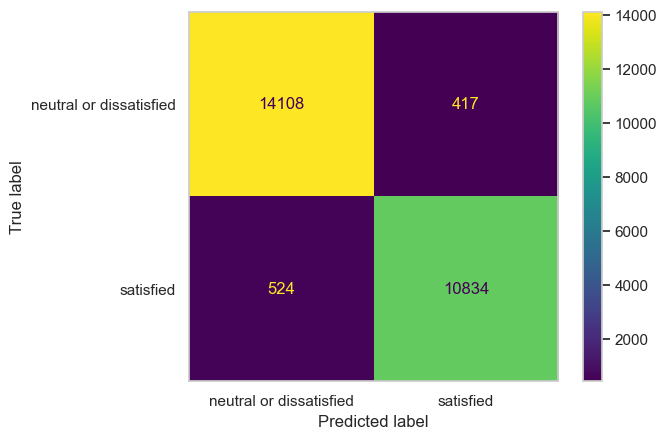

In [60]:
# random forest post-tuning confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, y_pred_test_catb_randcv, labels=catb_randcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=catb_randcv.classes_)

disp.plot()
plt.show()

# Model Saving

In [61]:
# save model terbaik
with open('catb_randcv.pkl','wb') as file_1:
    joblib.dump(catb_randcv,file_1)

## Conclusion
- Dengan metrik `F1-score`, model `CatBoost` adalah model terbaik untuk memprediksi kepuasan penumpang pesawat diantara model lainnya seperti `Logistic Regression,` `GradientBoost`, dan `XGBoost`
- Metrik `F1-Score` cocok digunakan pada balanced dataset dan digunakan untuk melihat performa klasifikasi terhadap semua kelas secara umum  
- Didapati performa sebelum dan sesudah tuning relatif sama
- Model terbaik untuk kasus ini adalah `CatBoost` dengan `F1-score` mencapai `0.9584` terhadap test-set

## Further Improvement
- Tuning hyperparameter dan iterasi yang lebih banyak untuk membuat model lebih baik.